In [3]:
import numpy as np

# Linear regression problem
X = np.array([0, 1, 2, 3, 4, 5]) 
Y = np.array([0, 1.1, 1.9, 3, 4.2, 5.2])  

# Model initialization
m = np.random.randn()  # Initialize the slope (random number)
b = np.random.randn()  # Initialize the intercept (random number)

learning_rate = 0.01  # Define the learning rate
epochs = 10000  # Define the number of iterations

# SGD implementation
for _ in range(epochs):
    random_index = np.random.randint(len(X))  # select a random sample
    x = X[random_index]
    y = Y[random_index]
    pred = m * x + b  # Calculate the predicted y
    # Calculate gradients for m (slope) and b (intercept)
    grad_m = (pred - y) * x 
    grad_b = (pred - y)
    m -= learning_rate * grad_m  # Update m using the calculated gradient
    b -= learning_rate * grad_b  # Update b using the calculated gradient

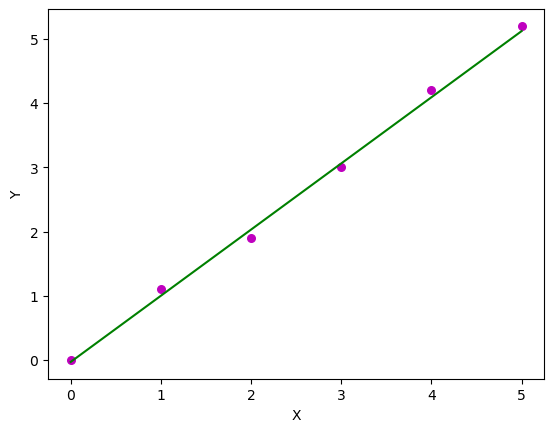

In [4]:
import matplotlib.pyplot as plt

# Plot the data points
plt.scatter(X, Y, color = "m", marker = "o", s = 30)

# Predicted line for the model
y_pred = m * X + b

# Plotting the predicted line
plt.plot(X, y_pred, color = "g")

# Adding labels to the plot
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

In [7]:
##Can use in bootstrap(n) = think about it

shuffled_indices = np.random.permutation(1000)

In [8]:
def gradient_descent(X, y, learning_rate=0.01, batch_size=16, epochs=100):
    m, n = X.shape
    theta = np.random.randn(n, 1)  # random initialization

    for epoch in range(epochs):
        shuffled_indices = np.random.permutation(m)
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for i in range(0, m, batch_size):
            xi = X_shuffled[i:i + batch_size]
            yi = y_shuffled[i:i + batch_size]

            gradients = 2 / batch_size * xi.T.dot(xi.dot(theta) - yi)
            theta = theta - learning_rate * gradients

    return theta

In [9]:
from sklearn.metrics import mean_absolute_error

# Apply function to some data
X = np.random.rand(100, 3)
y = 5 * X[:, 0] - 3 * X[:, 1] + 2 * X[:, 2] + np.random.randn(100, 1)  # sample linear regression problem
theta = gradient_descent(X, y)

# Predict and calculate MAE
predictions = X.dot(theta)
mae = mean_absolute_error(y, predictions)
print(f"MAE: {mae}")  # MAE: 1.0887166179544072

MAE: 0.9790136732437626


In [10]:
import numpy as np
from sklearn.metrics import mean_absolute_error

# Mini-Batch Gradient Descent function
def gradient_descent(X, y, learning_rate=0.01, batch_size=16, epochs=100):
    m, n = X.shape
    theta = np.random.randn(n, 1)  # random initialization

    for epoch in range(epochs):
        shuffled_indices = np.random.permutation(m)
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for i in range(0, m, batch_size):
            xi = X_shuffled[i:i + batch_size]
            yi = y_shuffled[i:i + batch_size]
            pred = xi.dot(theta)
            gradients = 2 / batch_size * xi.T.dot(pred - yi)
            theta = theta - learning_rate * gradients 

    return theta

# Create some data to work with
np.random.seed(42)  # seed the generator for reproducibility
X = np.random.rand(100, 3)
y = 5 * X[:, 0] - 3 * X[:, 1] + 2 * X[:, 2] + np.random.randn(100, 1)  # creating a sample linear regression problem

# Apply Mini-Batch Gradient Descent to our data
theta = gradient_descent(X, y)

# Generate predictions and calculate the Mean Absolute Error (MAE)
predictions = X.dot(theta)
mae = mean_absolute_error(y, predictions)
print(f"MAE: {mae}")  # Output the Mean Absolute Error

MAE: 0.9583619887128324


In [12]:
import matplotlib.pyplot as plt
import numpy as np

def func(x):   
    return x**2

def grad_func(x): 
    return 2*x

gamma = 0.9
learning_rate = 0.01
v = 0
epochs = 50

theta_plain = 4.0  
theta_momentum = 4.0

history_plain = []    
history_momentum = []    

for _ in range(epochs):
    history_plain.append(theta_plain)
    gradient = grad_func(theta_plain)
    theta_plain = theta_plain - learning_rate * gradient

    history_momentum.append(theta_momentum)
    gradient = grad_func(theta_momentum)
    v = gamma * v + learning_rate * gradient
    theta_momentum = theta_momentum - v

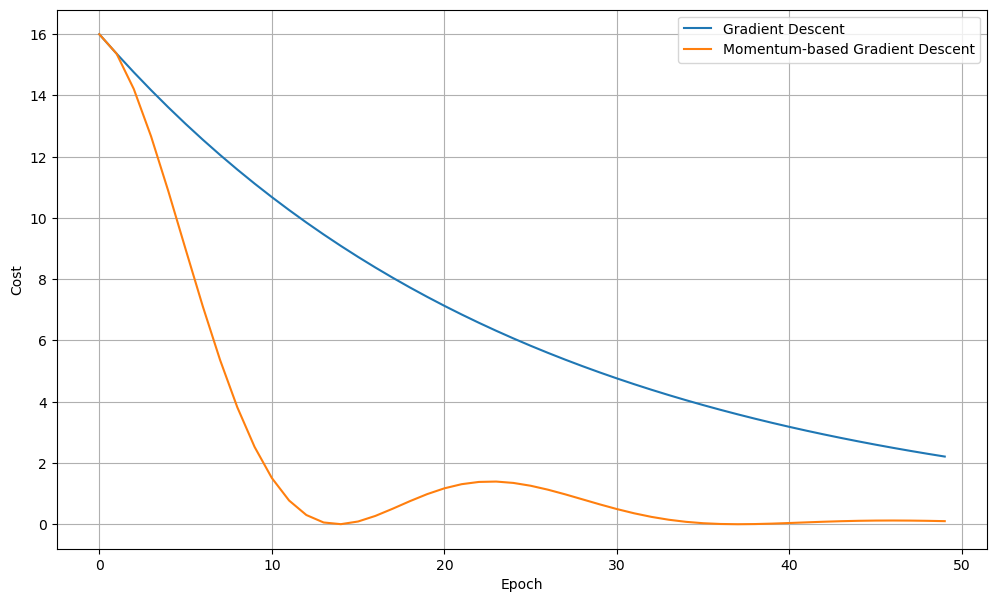

In [13]:
plt.figure(figsize=(12, 7))
plt.plot([func(theta) for theta in history_plain], label='Gradient Descent')
plt.plot([func(theta) for theta in history_momentum], label='Momentum-based Gradient Descent')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.legend()
plt.grid()
plt.show()

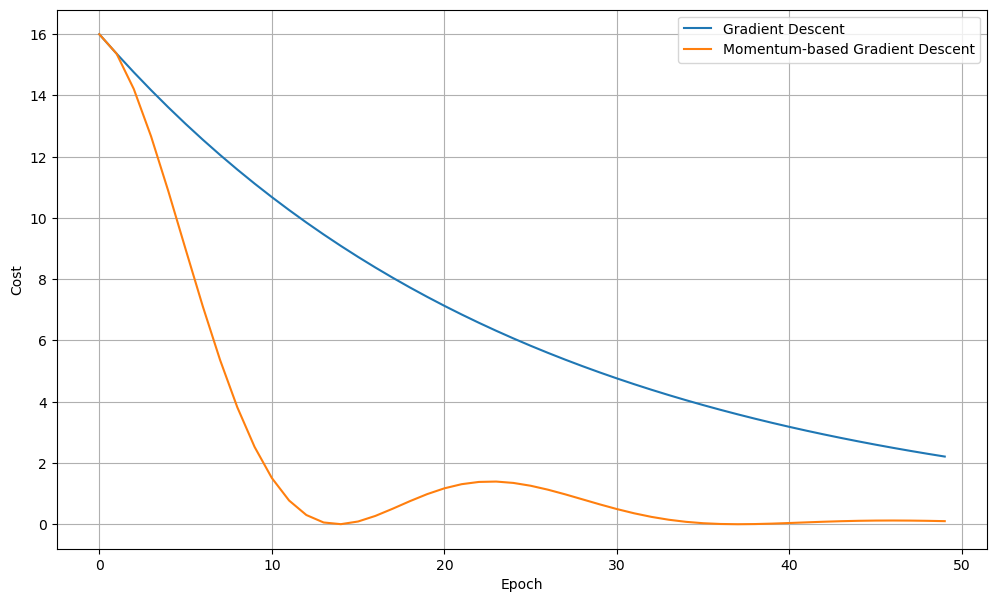

In [14]:
import matplotlib.pyplot as plt
import numpy as np

def func(x):   
    return x**2

def grad_func(x): 
    return 2*x

alpha = 0.9
learning_rate = 0.01
momentum = 0
epochs = 50

theta_plain = 4.0  
theta_momentum = 4.0

history_plain = []    
history_momentum = []    

for _ in range(epochs):
    history_plain.append(theta_plain)
    gradient_plain = grad_func(theta_plain)
    theta_plain = theta_plain - learning_rate * gradient_plain

    history_momentum.append(theta_momentum)
    gradient_momentum = grad_func(theta_momentum)
    # TODO: Calculate the new momentum and update theta_momentum accordingly
    momentum = alpha * momentum + learning_rate * gradient_momentum 
    theta_momentum = theta_momentum - momentum 

plt.figure(figsize=(12, 7))
plt.plot([func(theta) for theta in history_plain], label='Gradient Descent')
plt.plot([func(theta) for theta in history_momentum], label='Momentum-based Gradient Descent')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.legend()
plt.grid()
plt.show()

In [17]:
import numpy as np

def RMSProp(learning_rate, rho, epsilon, grad, s_prev):
    # TODO: Implement the RMSProp update for the squared gradient 's'
    s = rho * s_prev + (1-rho) * np.power(grad , 2)
    updates = learning_rate * grad / (np.sqrt(s) + epsilon)
    return updates, s 

def ADAM(beta1, beta2, epsilon, grad, m_prev, v_prev, learning_rate):
    # Update biased first-moment estimate
    m = beta1 * m_prev + (1 - beta1) * grad

    # Update biased second raw moment estimate
    v = beta2 * v_prev + (1 - beta2) * np.power(grad, 2)

    # Calculate updates
    updates = learning_rate * m / (np.sqrt(v) + epsilon)
    return updates, m, v

# Define the function and its gradient
def f(x, y):
    return x**2 + y**2

def df(x, y):
    return np.array([2*x, 2*y])

# Initial parameters and hyperparameters
coordinates = np.array([5.0, 4.0])
learning_rate = 0.1
rho = 0.9
epsilon = 1e-6
max_epochs = 100
s_prev = np.array([0, 0])

# Optimization loop
for epoch in range(max_epochs + 1):
    grad = df(coordinates[0], coordinates[1])
    # TODO: Use the RMSProp function to calculate 'updates' and the new 's_prev'
    updates , s_prev = RMSProp(learning_rate , rho , epsilon , grad , s_prev)
    coordinates -= updates
    if epoch % 20 == 0:
        print(f"Epoch {epoch}, current state: {coordinates}")

Epoch 0, current state: [4.68377233 3.68377236]
Epoch 20, current state: [2.3688824  1.47561697]
Epoch 40, current state: [0.95903672 0.35004133]
Epoch 60, current state: [0.13761293 0.00745214]
Epoch 80, current state: [3.91649374e-04 3.12725069e-09]
Epoch 100, current state: [-3.07701828e-17  2.18862195e-20]


In [18]:
import numpy as np

def ADAM(beta1, beta2, epsilon, grad, m_prev, v_prev, learning_rate):
    m = beta1 * m_prev + (1 - beta1) * grad
    v = beta2 * v_prev + (1 - beta2) * np.power(grad, 2)
    updates = learning_rate * m / (np.sqrt(v) + epsilon)
    return updates, m, v

def df(x, y):
    return np.array([2 * x, 2 * y])

coordinates = np.array([3.0, 4.0])
learning_rate = 0.02
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8
max_epochs = 150

m_prev = np.array([0, 0])
v_prev = np.array([0, 0])

for epoch in range(max_epochs + 1):
    grad = df(coordinates[0], coordinates[1])
    updates, m_prev, v_prev = ADAM(beta1, beta2, epsilon, grad, m_prev, v_prev, learning_rate)
    coordinates -= updates
    if epoch % 30 == 0:
        print(f"Epoch {epoch}, current state: {coordinates}")

Epoch 0, current state: [2.93675445 3.93675445]
Epoch 30, current state: [0.04633929 0.79306795]
Epoch 60, current state: [-0.11985912 -0.07173471]
Epoch 90, current state: [ 0.01876003 -0.04027612]
Epoch 120, current state: [ 0.00163686 -0.00029362]
Epoch 150, current state: [-0.00109858  0.00168961]


In [19]:
import numpy as np

def ADAM(beta1, beta2, epsilon, grad, m_prev, v_prev, lr):
    m = beta1 * m_prev + (1 - beta1) * grad
    v = beta2 * v_prev + (1 - beta2) * np.power(grad, 2)
    m_hat = m / (1 - np.power(beta1, epoch + 1))  # Correcting the first moment
    v_hat = v / (1 - np.power(beta2, epoch + 1))  # Correcting the second moment
    w_update = lr * m_hat / (np.sqrt(v_hat) + epsilon)
    return w_update, m, v

# Initialize variables
coordinates = np.array([3.0, 4.0])
m_prev = np.array([0.0, 0.0])
v_prev = np.array([0.0, 0.0])

# Hyperparameters
learning_rate = 0.02
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8
max_epochs = 150

# Gradient function for our function f(x, y) = x^2 + y^2
def df(x, y):
    return np.array([2 * x, 2 * y])

# Optimization loop
for epoch in range(max_epochs + 1):
    grad = df(coordinates[0], coordinates[1])
    updates, m_prev, v_prev = ADAM(beta1, beta2, epsilon, grad, m_prev, v_prev, learning_rate)
    coordinates -= updates

    if epoch % 30 == 0:
        print(f"Epoch {epoch}, coordinates: {coordinates}")

Epoch 0, coordinates: [2.98 3.98]
Epoch 30, coordinates: [2.39207348 3.3888243 ]
Epoch 60, coordinates: [1.85805354 2.83631948]
Epoch 90, coordinates: [1.39801539 2.33613383]
Epoch 120, coordinates: [1.01650819 1.8918457 ]
Epoch 150, coordinates: [0.71241955 1.50457549]
